#### Quicken Quickbooks Upgrade Assignment

The purpose of this exercise is to provide you with the opportunity to try your hand at modeling the response to an upsell campaign. The "intuit.csv" file contains data on 20,000 individuals who were selected at random from the 801,821 who were sent the wave-one mailing. Variable "res1" denotes which of these individuals responded to the mailing. The remaining variables are available to help you predict who will respond to a wave-two mailing.

I have simplified, added, and deleted some of the variables listed in Exhibit 3 of the case.

---

#### Import Libraries and Data Preparation

In [1]:
import pandas as pd
import mba263
import numpy
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('intuit.csv')

In [4]:
data

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,M,0,99824,20,4,58.0,8,19,0,0,1,0
19996,19997,M,0,99835,20,1,22.0,17,2,0,0,0,0
19997,19998,M,0,99835,20,1,29.5,12,14,0,0,0,0
19998,19999,M,0,99901,20,2,111.5,19,22,0,0,1,0


---

#### Question 1

**Decide to which of the 20,000 individuals you would choose to mail wave two.**

**Completely specify which individuals should receive the mailing.** 

1/3 of your grade on this assignment will be based on the profit achieved on your mailing by comparing your prediction with the actual findings from the second mailing (which I know because all consumers who did not respond in wave 1 were mailed in wave 2).

For the purposes of this exercise, each mail piece costs $1.41, and the profit from each responder is $60. Thus, the response rate needed to break even is 2.35%. Please ignore any other number in the case that relates to profits and costs.

Please note the following statement in the case (page 4): "Usual practice would be to assume a 50 percent drop off in response from wave 1 to wave 2." For your analysis this means that when you decide whom to mail to in wave 2, you should assume that the response probabilities in wave 2 are only 50% of the response probabilities you predict based on wave 1 responses.

In [5]:
# Calculate total number of buyers

mba263.tabulate(data['res1'])

,Name,Count,Frequency
0,0,19039,0.95195
1,1,961,0.04805


The response rate = **4.805%**

In [6]:
# Create dummy variables for gender
data['dummy_male'] = 1 * (data['sex']=='M')
data['dummy_female'] = 1 * (data['sex']=='F')
data['dummy_both_genders'] = 1 * (data['sex']=='B')
data['dummy_unknown_gender'] = 1 * (data['sex']=='U')

# Review to make sure that the dummy variables for gender are updated.
data.head()

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,dummy_male,dummy_female,dummy_both_genders,dummy_unknown_gender
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0,0,0,0,1
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0,0,0,0,1
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0,0,0,0,1
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0,0,0,0,1
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0,0,0,0,1


In [7]:
# Estimate logit for whether customer's current Quickbooks is version 1 or not.

res = mba263.logit(data['res1'],data[['bizflag','zip_bins','numords',
                                      'dollars','last','sincepurch','version1','owntaxprod','upgraded',
                                      'dummy_male','dummy_female','dummy_both_genders','dummy_unknown_gender']])

Optimization terminated successfully.
         Current function value: 0.178707
         Iterations 8


In [8]:
data['predicted_res'] = res.predict()

In [9]:
data_mailto_res = data[data['predicted_res']>=0.0235]

In [10]:
mba263.tabulate(data_mailto_res['res1'])

,Name,Count,Frequency
0,0,13233,0.939043
1,1,859,0.060957


In [11]:
# Total number of customer to mail to

total_to_mail = len(data_mailto_res)
total_to_mail

14092

In [12]:
# Calculate profit

total_population = 801821
sample_size = 20000
profit_each_responder = 60
mailing_cost = 1.41
second_wave_probability_drop_to = 0.50

profit1 = total_population/sample_size*(859*profit_each_responder-total_to_mail*mailing_cost)*second_wave_probability_drop_to

print(f"Profit = ${profit1:0.2f}")

Profit = $634847.39


---

#### Neural Network

In [13]:
res_nn = mba263.neural_network(data['res1'],data[['bizflag','zip_bins','numords',
                                      'dollars','last','sincepurch','version1','owntaxprod','upgraded',
                                      'dummy_male','dummy_female','dummy_both_genders','dummy_unknown_gender']])

In [15]:
data['p_nn'] = res_nn.predict(data[['bizflag','zip_bins','numords',
                                      'dollars','last','sincepurch','version1','owntaxprod','upgraded',
                                      'dummy_male','dummy_female','dummy_both_genders','dummy_unknown_gender']])

In [23]:
data_mailto_res_nn = data[data['p_nn']>=0.0235]

In [24]:
mba263.tabulate(data_mailto_res_nn['res1'])

,Name,Count,Frequency
0,0,11303,0.930441
1,1,845,0.069559


In [25]:
# Total number of customer to mail to

total_to_mail_nn = len(data_mailto_res_nn)
total_to_mail_nn

12148

In [26]:
# Calculate profit

total_population = 801821
sample_size = 20000
profit_each_responder = 60
mailing_cost = 1.41
second_wave_probability_drop_to = 0.50

profit1_nn = total_population/sample_size*(845*profit_each_responder-total_to_mail_nn*mailing_cost)*second_wave_probability_drop_to

print(f"Profit = ${profit1_nn:0.2f}")

Profit = $672954.73


In [18]:
# Gains
gains1=mba263.gain(data['res1'],data['predicted_res'],bins=30)

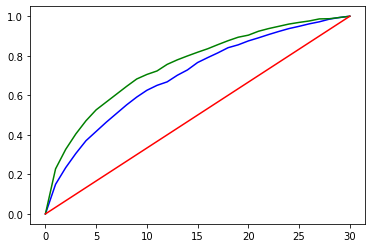

In [20]:
gains_nn=mba263.gain(data['res1'],data['p_nn'],30)
plt.plot(gains1,'b') ## Logit
plt.plot(gains_nn,'g') ## Neural Network
plt.plot([0,30],[0,1],'r')